In [1]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from sympy.physics.quantum import Ket

In [2]:
MAX_N = 15
L = 1
xmin = 0
xmax = 1
domain = np.linspace(xmin, xmax, 1000)

In [3]:
def y0(x):
    return .5 * (1.7*(x/L)**2 - 0.7*(x/L) - (x/L)**3) * np.log(1 + (x/L))

def dot(x, n):
    return (np.sqrt(2/L) * np.sin(n*np.pi*x/L)) * y0(x)

def y(N, A, t=0):
    total = np.zeros_like(domain)
    for n in range(N):
        total += A[n] * np.sqrt(2/L) * np.sin((n+1)*np.pi*domain/L)
    return total

In [4]:
an = [integrate.quad(dot, 0, 1, args=(i,))[0] for i in range(1, MAX_N+1)]

In [5]:
an

[-0.005154164776294889,
 -0.004328980360319198,
 0.0024561393447709717,
 -0.0003366229903087488,
 0.0005975217457739513,
 -8.601791327102345e-05,
 0.0002249994224736602,
 -3.4143178990803666e-05,
 0.00010730452040902481,
 -1.696047454628176e-05,
 5.917605937349754e-05,
 -9.649339503056123e-06,
 3.599230912760106e-05,
 -6.013166257460447e-06,
 2.348786027800311e-05]

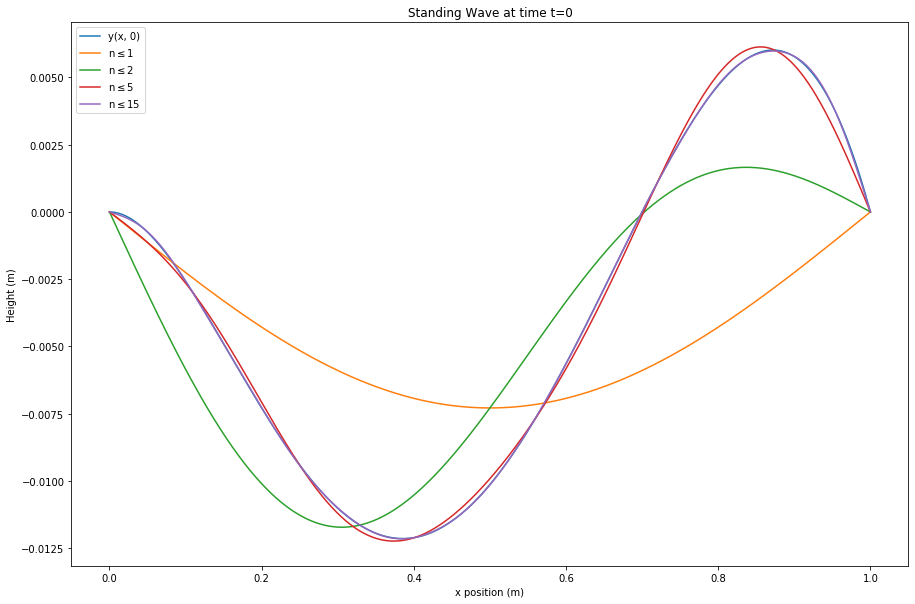

In [6]:
plt.figure(figsize=(15,10))
plt.plot(domain, y0(domain), label="y(x, 0)")
for i in [1, 2, 5, 15]:
    plt.plot(domain, y(i, an), label=f"n$\leq${i}")
plt.legend()
plt.title("Standing Wave at time t=0")
plt.xlabel("x position (m)"); plt.ylabel("Height (m)")
plt.show()